<a href="https://colab.research.google.com/github/AzadMehedi/ML-Algorithoms/blob/main/Logistic_Regression_Binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear and Logistic Regression
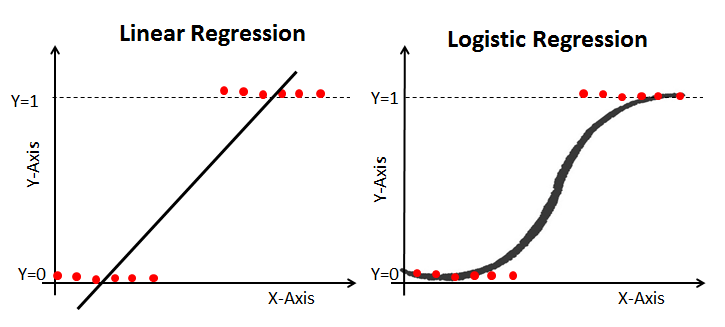

### Sigmoid Function
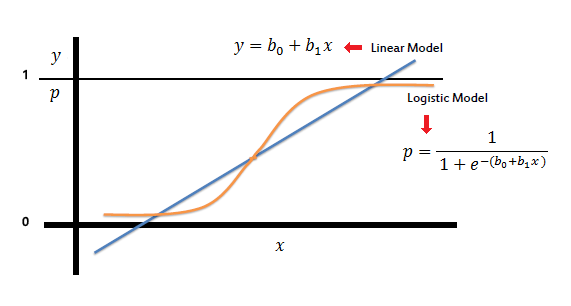

### Threds value
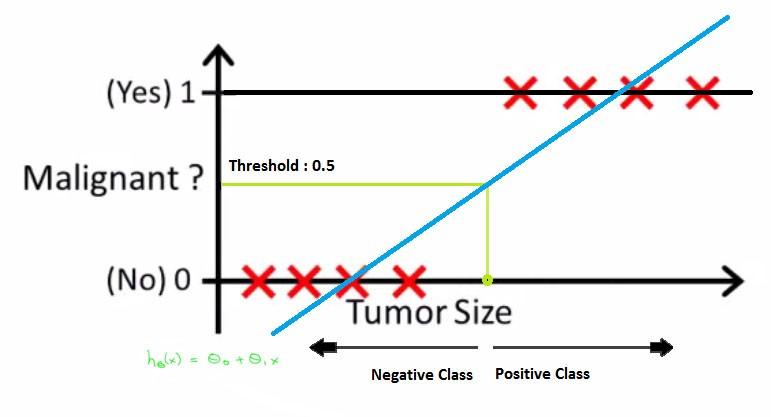

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-heberman.csv'
df = pd.read_csv(url)
df.head()

,age,operation_year,axil_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
features = ['age', 'operation_year', 'axil_nodes']
x = df[features]
df['status'] = df['status'].map({1:0, 2:1})
y = df['status']

In [ ]:
df.head()

,age,operation_year,axil_nodes,status
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# our model i ready for predict, lets check the accuracy
print('Coefficient: ', logreg.coef_)
print('Intercept: ', logreg.intercept_)

predictions = logreg.predict(x_test)
print('Classification Report: ', classification_report(y_test, predictions))

print('Confusion Matrix: ', confusion_matrix(y_test, predictions))
print('Accuracy_score:', accuracy_score(y_test, predictions))

print("Precision: ", metrics.precision_score(y_test, predictions))
print("Recall: ", metrics.recall_score(y_test,predictions ))

Coefficient:  [[ 0.01558675 -0.03293527  0.07053309]]
Intercept:  [-0.00057878]
Classification Report:                precision    recall  f1-score   support

           0       0.81      1.00      0.90        60
           1       1.00      0.18      0.30        17

    accuracy                           0.82        77
   macro avg       0.91      0.59      0.60        77
weighted avg       0.85      0.82      0.76        77

Confusion Matrix:  [[60  0]
 [14  3]]
Accuracy_score: 0.8181818181818182
Precision:  1.0
Recall:  0.17647058823529413


### our model accuracy is : 81%

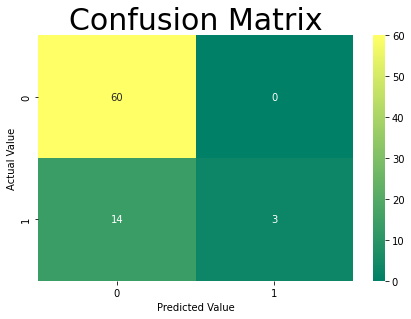

In [ ]:
# visualize the confusion matrix

class_name = [0,1]  # name of classes
fig, ax = plt.subplots()
tick_marks =  np.arange(len(class_name))
plt.xticks(tick_marks, class_name)
plt.yticks(tick_marks, class_name) 

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions)), annot=True, cmap='summer', fmt='g')
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion Matrix', size=30)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

### Another method for evaluating how well different classification models perform is the `ROC-AUC` curve. `ROC` stands for `Receiver Operating Curve` and `AUC` stands for `Area Under Curve`.
### The blue line shown in the image below is the ROC, and the area below this ROC is the AUC. `The higher the ROC value i.e. the closer the blue line moves upwards to (1), the better our model is`.


## returns
- `fpr` : ndarray of shape (>2,)
Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].

- `tpr` : ndarray of shape (>2,)
Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].

- `thresholds` : ndarray of shape = (n_thresholds,)
Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.

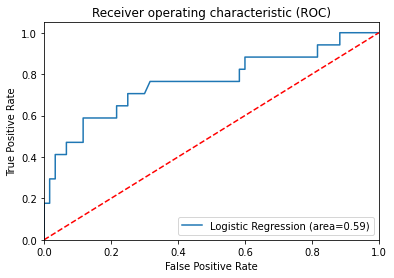

In [16]:
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [27]:
# predict
# Suppose a patient is 35 years old, had surgery in 1964 and has 15 lymph nodes next to a cancer cell.
# now your model needs to predict whether he lived 5 years or died before that?

# new_observation = [[35, 1964, 15]]
# logreg.predict(new_observation)
new_observation = [[35,64, 15]]
logreg.predict(new_observation)

array([0])

### Prediction Result: prediction result shows us array[0]. that means she survived more than 5 years after operation.

In [28]:
logreg.predict_proba(new_observation)

array([[0.62361094, 0.37638906]])

### - prediction probability result: the probability of survived >5 years after operation is 62% 
### - and probability of survived <5 years after operation is 37%. 